В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import auc, roc_auc_score, confusion_matrix, f1_score, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

In [3]:
raw_df = pd.read_csv('data/bank-customer-churn-prediction-dlu/train.csv')
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [5]:
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [6]:
raw_df.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)

In [7]:
columnsT = ['Exited']
targets = raw_df[columnsT]
columns = raw_df.drop(columns='Exited').columns
columns
inputs = raw_df[columns]

In [205]:
targets

,Exited
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
14995,0.0
14996,0.0
14997,1.0
14998,0.0


In [8]:

train_inputs, val_inputs, train_target, val_target = train_test_split(inputs, targets, test_size=0.2, random_state=12, stratify=targets['Exited'])
train_target

,Exited
3709,0.0
5745,0.0
3602,0.0
925,0.0
11868,0.0
...,...
13280,0.0
13483,0.0
6625,1.0
1774,0.0


In [9]:
numeric_cols = raw_df.select_dtypes("number").columns.to_list()
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [10]:
categorical_cols = np.setdiff1d(raw_df.columns, np.array(numeric_cols))
categorical_cols

array(['Gender', 'Geography'], dtype=object)

In [11]:
numeric_cols[:-1]

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [12]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', MinMaxScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
       ('encoder', OneHotEncoder())
    ]
)
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols[:-1]),
    ('cat', categorical_transformer, categorical_cols)
])

In [13]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(solver='liblinear'))  
])

In [14]:
model_pipeline.fit(train_inputs, train_target['Exited'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  array(['Gender', 'Geography'], dtype=object))])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [15]:
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, preds)
    f1_ = f1_score(targets, preds)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    print(f"F1 score on {name} dataset: {f1_:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

Area under ROC score on Train dataset: 0.75%
F1 score on Train dataset: 0.63%


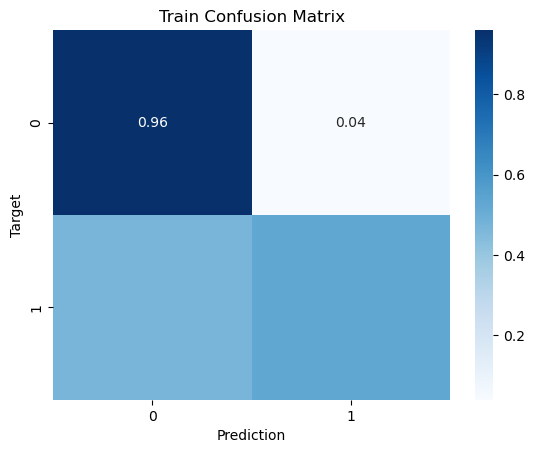

Area under ROC score on Validate dataset: 0.76%
F1 score on Validate dataset: 0.65%


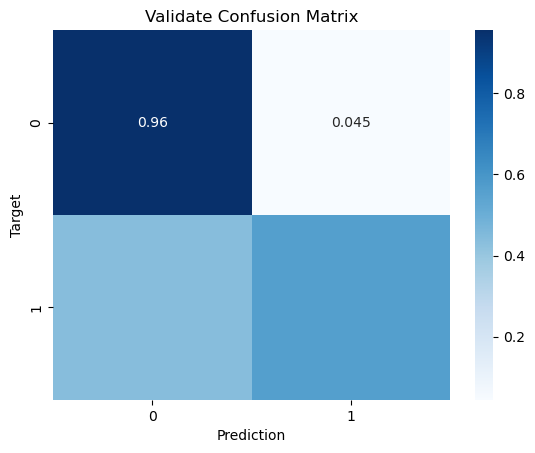

In [16]:
train_preds = predict_and_plot(model_pipeline, train_inputs, train_target, 'Train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_target, 'Validate')

In [17]:
storedObject = {
    'model': model_pipeline,
    'num_cols': numeric_cols,
    'cat_cols': categorical_cols,
    'train_inputs': train_inputs,
    'train_target': train_target,
    'val_inputs': val_inputs,
    'val_target': val_target
}
joblib.dump(storedObject, 'data/bank-customer-churn-prediction-dlu/model_with_pipeline')

['data/bank-customer-churn-prediction-dlu/model_with_pipeline']

In [ ]:

# Створюємо трен. і вал. набори
input_cols = ...
target_col = ...
train_inputs, train_targets = ...
val_inputs, val_targets = ...

# Виявляємо числові і категоріальні колонки
numeric_cols = ...
categorical_cols = ...

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', ...)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ...)
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ...),
        ('cat', ...)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', ...),
    ('classifier', ...)
])

# Тренуємо пайплайн
....

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = ...
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(...)
val_preds = predict_and_plot(...)

# Зберігаємо модель для подальшого використання
joblib.dump()


**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

Area under ROC score on Train dataset: 0.78%
F1 score on Train dataset: 0.69%


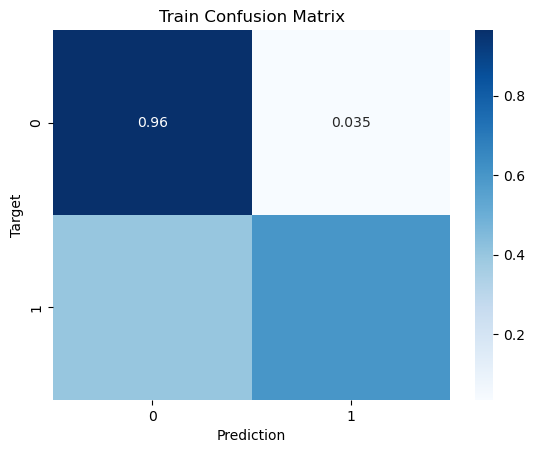

Area under ROC score on Validate dataset: 0.79%
F1 score on Validate dataset: 0.70%


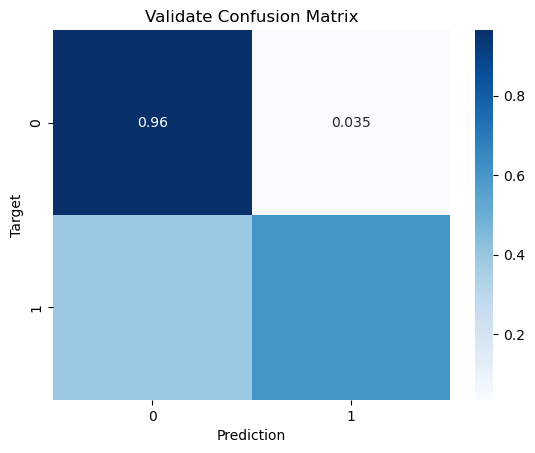

In [18]:
numeric_transformer_p2 = Pipeline(
    steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(2))
    ]
)
preprocessor_p2 = ColumnTransformer([
    ('num', numeric_transformer_p2, numeric_cols[:-1]),
    ('cat', categorical_transformer, categorical_cols)
])
model_pipeline_p2 = Pipeline([
    ('preprocessor', preprocessor_p2), 
    ('classifier', LogisticRegression(solver='liblinear'))  
])
model_pipeline_p2.fit(train_inputs, train_target['Exited'])
train_preds_p2 = predict_and_plot(model_pipeline_p2, train_inputs, train_target, 'Train')
val_preds_p2 = predict_and_plot(model_pipeline_p2, val_inputs, val_target, 'Validate')

### На мою думку модель добре генералізує, точність однкова на тренувальних і валідаційних даних

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

Area under ROC score on Train dataset: 0.81%
F1 score on Train dataset: 0.73%


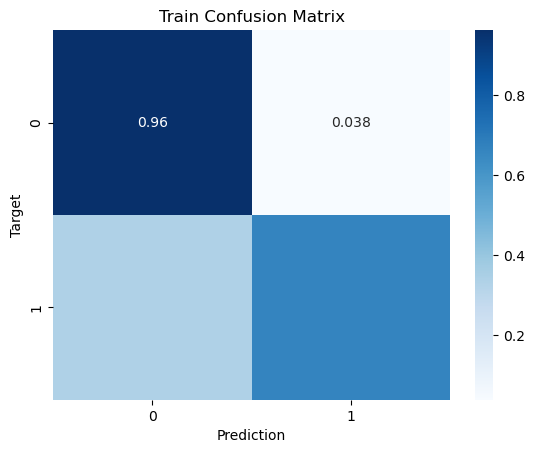

Area under ROC score on Validate dataset: 0.81%
F1 score on Validate dataset: 0.73%


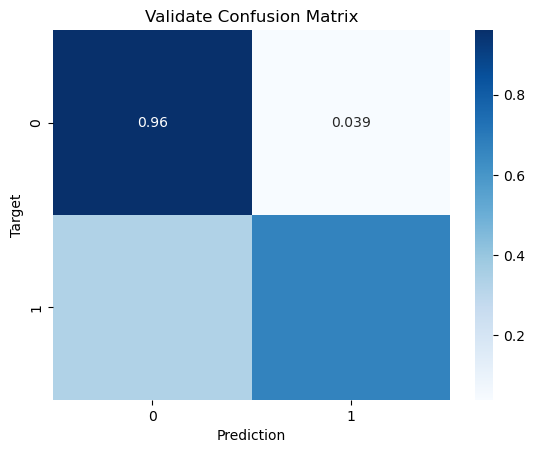

In [19]:
numeric_transformer_p4 = Pipeline(
    steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(4))
    ]
)
preprocessor_p4 = ColumnTransformer([
    ('num', numeric_transformer_p4, numeric_cols[:-1]),
    ('cat', categorical_transformer, categorical_cols)
])
model_pipeline_p4 = Pipeline([
    ('preprocessor', preprocessor_p4), 
    ('classifier', LogisticRegression(solver='liblinear'))  
])
model_pipeline_p4.fit(train_inputs, train_target['Exited'])
train_preds_p4 = predict_and_plot(model_pipeline_p4, train_inputs, train_target, 'Train')
val_preds_p4 = predict_and_plot(model_pipeline_p4, val_inputs, val_target, 'Validate')

In [20]:
def polynomialCalc(feature_score):
    numeric_transformer_p = Pipeline(
        steps=[
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(feature_score))
        ]
    )
    preprocessor_p = ColumnTransformer([
        ('num', numeric_transformer_p, numeric_cols[:-1]),
        ('cat', categorical_transformer, categorical_cols)
    ])
    model_pipeline_p = Pipeline([
        ('preprocessor', preprocessor_p), 
        ('classifier', LogisticRegression(solver='liblinear'))  
    ])
    model_pipeline_p.fit(train_inputs, train_target['Exited'])
    train_preds_p = predict_and_plot(model_pipeline_p, train_inputs, train_target, 'Train Polynomial Features {}'.format(feature_score))
    val_preds_p = predict_and_plot(model_pipeline_p, val_inputs, val_target, 'Validate Polynomial Features {}'.format(feature_score))

Area under ROC score on Train Polynomial Features 5 dataset: 0.85%
F1 score on Train Polynomial Features 5 dataset: 0.78%


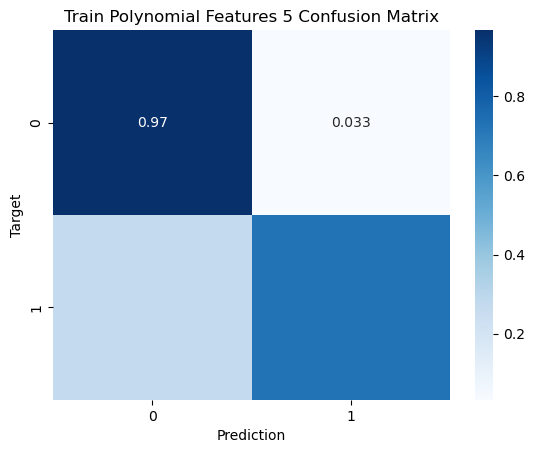

Area under ROC score on Validate Polynomial Features 5 dataset: 0.80%
F1 score on Validate Polynomial Features 5 dataset: 0.70%


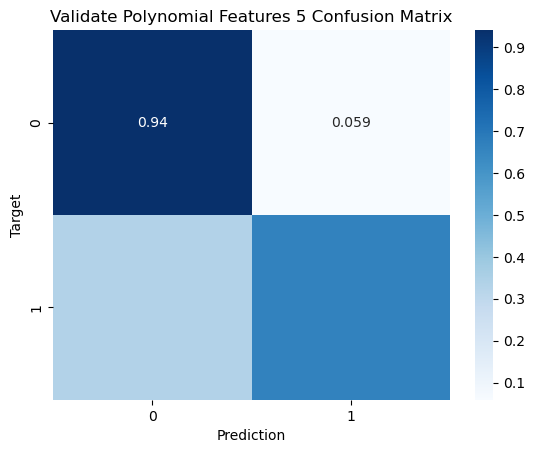

In [21]:
polynomialCalc(5)

In [22]:
storedObject = {
    'model': model_pipeline_p4,
    'num_cols': numeric_cols,
    'cat_cols': categorical_cols
}
joblib.dump(storedObject, 'data/bank-customer-churn-prediction-dlu/logistic_regression_with_polynom')

['data/bank-customer-churn-prediction-dlu/logistic_regression_with_polynom']

### Зі степенм 5 для пономіальних фічей точність моделі падає і отримуємо перенавчання, в той же час степінь 4 схоже підходить найкраще

Area under ROC score on Train Polynomial Features 4 dataset: 0.82%
F1 score on Train Polynomial Features 4 dataset: 0.75%


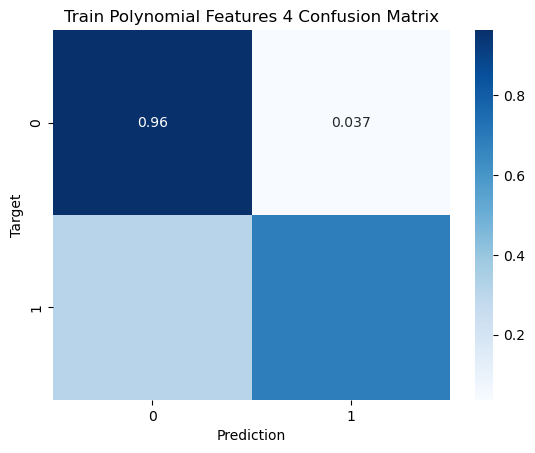

Area under ROC score on Validate Polynomial Features 4 dataset: 0.81%
F1 score on Validate Polynomial Features 4 dataset: 0.73%


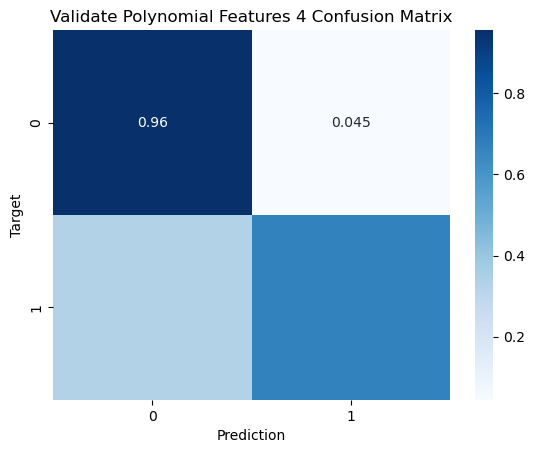

In [267]:
polynomialCalc(4)

In [59]:

test_df = pd.read_csv('data/bank-customer-churn-prediction-dlu/test.csv', index_col=0)
test_inputs = test_df[numeric_cols[:-1] + categorical_cols.tolist()]
loaded_model = joblib.load('data/bank-customer-churn-prediction-dlu/logistic_regression_with_polynom')
model_pipeline_with_poly = loaded_model['model']

In [43]:
test_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72


In [61]:
test_pred = model_pipeline_p4.predict_proba(test_inputs).round(2)
test_df['Exited']=test_pred[:,1]

In [62]:
test_df_ready = test_df.reset_index()[['id', 'Exited']].set_index('id')

In [63]:
test_df_ready.to_csv('data/bank-customer-churn-prediction-dlu/submission_log_reg_v2.csv')

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [64]:
reg_df = pd.read_csv('data/bank-customer-churn-prediction-dlu/regression_data.csv')

In [69]:
reg_df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

In [72]:
input_columns = reg_df.columns
train_input, val_input, train_target, val_target = train_test_split(reg_df[input_columns[:-1]], reg_df['target'], test_size=0.2)

In [86]:
regr_data_models = [];
inputs = {
    'train_input': train_input,
    'val_input': val_input,
    'train_target': train_target,
    'val_target': val_target
};
def createPolyModel(inputs, level):
    regr_data_model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(level)),
        ('classifier', LinearRegression())
    ])
    regr_data_model.fit(inputs['train_input'], inputs['train_target'])
    regr_data_models.append(regr_data_model)

In [98]:
regr_data_models = []
for i in range(1,6):
    createPolyModel(inputs, i)

In [100]:
predictions_train = [];
predictions_val = [];
for poly_model in regr_data_models:
    pred_train = poly_model.predict(inputs['train_input'])
    pred_val = poly_model.predict(inputs['val_input'])
    predictions_train.append(pred_train)
    predictions_val.append(pred_val)
   

In [144]:
rmse = []
r2 = []
rmse_val = []
r2_val = []
for prediction_train in predictions_train:
    rmse.append(mean_squared_error(inputs['train_target'], prediction_train, squared=False))
    r2.append(r2_score(inputs['train_target'], prediction_train))
for prediction_val in predictions_val:
    rmse_val.append(mean_squared_error(inputs['val_target'], prediction_val, squared=False))
    r2_val.append(r2_score(inputs['val_target'], prediction_val))

In [133]:
r2, rmse

([0.9995200562950687, 0.9995651000467135, 0.9992736495009911, 1.0, 1.0],
 [1.0165505644059374,
  0.9676727614288754,
  1.2505669748193462,
  3.475105451144707e-13,
  3.1092300474041015e-13])

In [145]:
r2_val, rmse_val

([0.99927726989296,
  0.9991631867584839,
  0.9950467750817749,
  0.891627058674438,
  0.9201343238640539],
 [1.0908702068370313,
  1.1738139845035642,
  2.8558081715166503,
  13.358122988762686,
  11.46740348938615])

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лог регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [140]:
def calculateMetrixExtModel(model, inputs, level):
    regr_data_model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(level)),
        ('classifier', model)
    ])
    regr_data_model.fit(inputs['train_input'], inputs['train_target'])
    pred_train = regr_data_model.predict(inputs['train_input'])
    pred_val = regr_data_model.predict(inputs['val_input'])
    rmse_train = mean_squared_error(inputs['train_target'], pred_train, squared=False)
    rmse_val = mean_squared_error(inputs['val_target'], pred_val, squared=False)
    return dict(rmse_train = rmse_train.round(2), rmse_val = rmse_val.round(2))
    
def createExtModels(inputs,level):
    result_r = model_ridge_metrix = calculateMetrixExtModel(Ridge(), inputs, level)
    result_l = model_lasso_metrix = calculateMetrixExtModel(Lasso(), inputs, level)
    result_e = model_elastic_metrix = calculateMetrixExtModel(ElasticNet(), inputs, level)
    return dict(ridge = result_r, lasso = result_l, elastic = result_e)

    

In [139]:
result = {}
for i in range(1, 21):
    result[i] = createExtModels(inputs, i)

In [142]:
result

{1: {'ridge': {'rmse_train': 7.99, 'rmse_val': 7.61},
  'lasso': {'rmse_train': 4.7, 'rmse_val': 4.41},
  'elastic': {'rmse_train': 42.48, 'rmse_val': 37.28}},
 2: {'ridge': {'rmse_train': 5.43, 'rmse_val': 7.02},
  'lasso': {'rmse_train': 4.7, 'rmse_val': 4.41},
  'elastic': {'rmse_train': 37.56, 'rmse_val': 33.59}},
 3: {'ridge': {'rmse_train': 6.67, 'rmse_val': 7.95},
  'lasso': {'rmse_train': 4.7, 'rmse_val': 4.41},
  'elastic': {'rmse_train': 33.98, 'rmse_val': 31.37}},
 4: {'ridge': {'rmse_train': 6.84, 'rmse_val': 8.07},
  'lasso': {'rmse_train': 4.7, 'rmse_val': 4.41},
  'elastic': {'rmse_train': 31.98, 'rmse_val': 30.48}},
 5: {'ridge': {'rmse_train': 6.44, 'rmse_val': 7.94},
  'lasso': {'rmse_train': 4.7, 'rmse_val': 4.41},
  'elastic': {'rmse_train': 30.99, 'rmse_val': 30.25}},
 6: {'ridge': {'rmse_train': 6.05, 'rmse_val': 7.87},
  'lasso': {'rmse_train': 4.7, 'rmse_val': 4.41},
  'elastic': {'rmse_train': 30.51, 'rmse_val': 30.27}},
 7: {'ridge': {'rmse_train': 5.81, 'rmse

На цих даних краще всіх показує себе Лассо, хоча мені дивно, чому rmse не змінюється на рівнях полінома
На лінійній регресії ж модель добре показує себе на тренувальних даних і погано на валідаціних даних
Як на мене найкраще підходить лінійна регресія без полінома))